In [1]:
from sympy import *
init_printing(use_unicode=True)

# define symbols and coeff
a, x = symbols("a x", real=True)
b_1 = 1.00300865
b_2 = 1.0 # 2.96848838e-2

# define functions
f1 = (b_1/2) * (x**2) + (b_2/3) * (x**3)
f2 = f1.subs(x, a * x)

# basis for least squares fit
basis = [1 * f1, a * f1, a**2 * f1, a**3 * f1]
index = list(range(0, len(basis)))

# limits for integration
al = 1
au = 2
xl = 3
xu = 7

In [2]:
# Solve least squares 
def least_square_rhs(v):
    return integrate(integrate(f2 * v, (a, al, au)), (x, xl, xu))

def least_square_grammian(vi, vj):
    return integrate(integrate(vi * vj, (a, al, au)), (x, xl, xu))

b = Matrix(list(map(least_square_rhs, basis)))
G = Matrix([ [least_square_grammian(basis[i], basis[j]) for j in index] for i in index ])

solution = G.LUsolve(b)
c0 = solution[0]
c1 = solution[1]
c2 = solution[2]
c3 = solution[3]
print('c0: {:.2f}, c1: {:.2f}, c2: {:.2f}, c3: {:.2f}'.format(c0, c1, c2, c3))

c0: -0.00, c1: 0.00, c2: 0.20, c3: 0.80


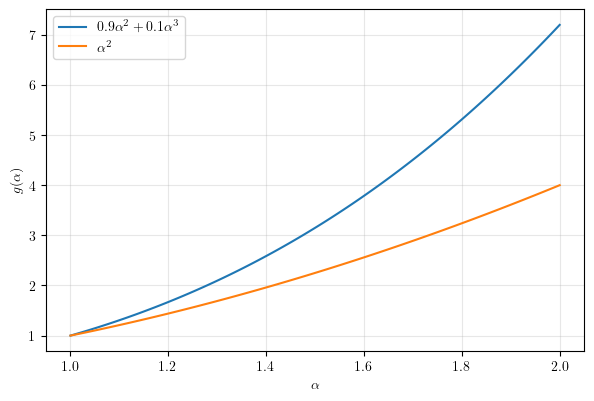

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size' : 10,
    'pgf.rcfonts': False,
})
alpha = np.linspace(1, 2, 100)
fig, ax = plt.subplots()
ax.plot(alpha, c0 + c1 * alpha + c2 * np.power(alpha, 2) + c3 * np.power(alpha, 3), label=r'$0.9\alpha^2 + 0.1\alpha^3$')
ax.plot(alpha, np.power(alpha, 2), label=r'$\alpha^2$')
ax.set_ylabel(r'$g(\alpha)$')
ax.set_xlabel(r'$\alpha$')
ax.legend(loc="best")
plt.grid(alpha=0.3)
fig.tight_layout()
fig.set_size_inches(6, 4)

/var/folders/hf/z5b5gb7x5dl5h93z_3fk_njm000vhk/T/ipykernel_3902/4289212406.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, zz2.astype(float), locator=ticker.LogLocator(), cmap='inferno')


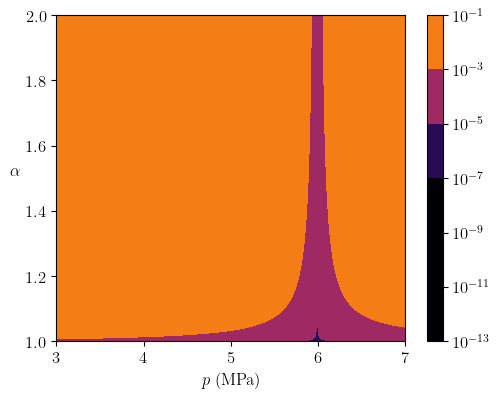

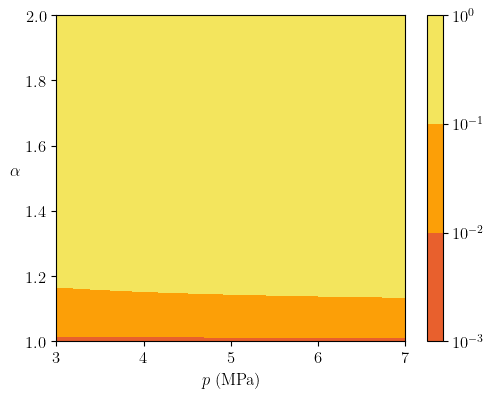

In [5]:
from matplotlib import ticker

matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size' : 12,
    'pgf.rcfonts': False,
})
X = np.linspace(3, 7, 500)
Y = np.linspace(1, 2.0, 500)
xx, yy = np.meshgrid(X, Y)
coeffs =[c0, c1, c2, c3]
def pi_cnga(x):
    return (b_1)*np.power(x, 2)/2 + (b_2) *np.power(x,3)/3
def rel_err(x, alpha, coeffs):
    c0, c1, c2, c3 = coeffs
    return abs( pi_cnga(alpha*x) - (c0 + c1*alpha + c2*(alpha**2) + c3*(alpha**3))*pi_cnga(x) )/abs(pi_cnga(alpha*x))

zz1 = rel_err(xx, yy, coeffs)

fig, ax = plt.subplots()
plt.contourf(xx, yy, zz1.astype(float), locator=ticker.LogLocator(), cmap='inferno')
plt.colorbar()
plt.ylabel(r'$\alpha$', rotation='horizontal', ha='right')
plt.xlabel(r'$p\; (\mathrm{MPa})$')
plt.clim(1e-7, 1)
fig.tight_layout()
fig.set_size_inches(5, 4)
plt.savefig('opt_gamma.pdf')

zz2 = rel_err(xx, yy, [0,0, 1, 0])

fig, ax = plt.subplots()
plt.contourf(xx, yy, zz2.astype(float), locator=ticker.LogLocator(), cmap='inferno')
plt.colorbar()
plt.ylabel(r'$\alpha$', rotation='horizontal', ha='right')
plt.xlabel(r'$p\; (\mathrm{MPa})$')
plt.clim(1e-7, 1)
fig.tight_layout()
fig.set_size_inches(5, 4)
plt.savefig('alpha_sq_gamma.pdf')

In [5]:
# More experiments
# if compressor ratios are all identical 
alpha0 = 1.5
#Compute RHS
b0 = integrate(f2 * basis[0], (x, xl, xu)).subs(a, alpha0)
b = Matrix([b0])

#Compute Grammian
g00 = integrate(basis[0] * basis[0], (x, xl, xu))
print(b, G)

soln = G.LUsolve(b)
c0 = soln[0]
h1=0.9 * (a**2) + 0.1 * (a**3)
h2 = -0.12 + 0.25* a + 0.72 * (a**2) + 0.14 * (a**3)
h3=0.85 * (a**2) + 0.15 * (a**3)

print(alpha0**2, h1.subs(a, alpha0), h2.subs(a, alpha0), h3.subs(a, alpha0))

Matrix([[2457.39066698889]]) Matrix([[1038.07941795210, 1557.11912692815, 2422.18530855490, 3892.79781732037], [1557.11912692815, 2422.18530855490, 3892.79781732037, 6436.09239130302], [2422.18530855490, 3892.79781732037, 6436.09239130302, 10899.8338884970], [3892.79781732037, 6436.09239130302, 10899.8338884970, 18833.7265828452]])


ShapeError: ``M`` and ``rhs`` must have the same number of rows.

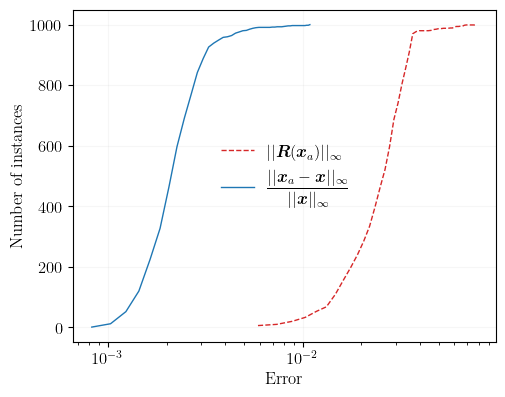

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size' : 12,
    'pgf.rcfonts': False,
    'text.latex.preamble': r"\usepackage{bm} \usepackage{amsmath}"
})

df = pd.read_csv('../../data/runs/GasLib-40-runs.csv') 

R_count, R_bins_count = np.histogram(df['R'], bins=50) 
R_pdf = R_count # / sum(R_count) 
R_cdf = np.cumsum(R_pdf) 
E_count, E_bins_count = np.histogram(df['E'], bins=50) 
E_pdf = E_count # / sum(E_count) 
E_cdf = np.cumsum(E_pdf) 

fig, ax = plt.subplots()
ax.plot(R_bins_count[1:], R_cdf, '--', color='tab:red', linewidth=1.0, label=r"$||\bm R(\bm x_a)||_{\infty}$") 
ax.plot(E_bins_count[1:], E_cdf, linewidth=1.0, label=r"$\dfrac{||\bm x_a -\bm x||_{\infty}}{||\bm x||_{\infty}}$")
ax.legend(edgecolor='1.0', frameon=False)
# ax.text(5*1e-4, 0.6, r'$\dfrac{||\bm x_a -\bm x||_{\infty}}{||\bm x||_{\infty}}$') 
# ax.text(8*1e-3, 0.6, r'$||\bm R(\bm x_a)||_{\infty}$') 
ax.set_xscale('log')
ax.grid(alpha=0.1)
ax.set_ylabel('Number of instances')
ax.set_xlabel('Error')
fig.tight_layout()
fig.set_size_inches(5, 4)
plt.savefig('cdf_GasLib40.pdf')